

# Project 3: Investigate the TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<h1>Introduction</h1>

<a id='intro'></a>


I had selected TMDb Movie dataset for analysis. The dataset is having information of around 10000 movies including user rating and revenue. For each movie, the dataset includes information on such as popularity, budget, revenue, cast, directors, production house, date of release, runtime, and its rating. 
<br>
<br>
RESEARCH QUESTIONS:
<br>1. How have movie production trends varied over the years?
<br>2a. What are the top 20 highest grossing movies? 
<br>2b. What are the top 20 most expensive movies? 
<br>3. How do budgets correlate with revenues? Do higher budget movies have higher revenue?
<br>4. Average runtime of all the movies.
<br>5. How do ratings correlate with commercial success (profits)?
<br>6. What run times are associated with each genre?
<br>7. Who are the top 20 directors who made highly rated films? The directors considered for  should have made atleast 5 movies in the time period 1960 - 2015 represented in the dataset.


 




In [64]:
# Imporing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### Loading data

In [65]:
# Load your data. 
db=pd.read_csv('tmdb_movies.csv')
db.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


### Dataset Observation
1. Some Missing value, some data of budget and revenue are Zero.
2. No standar unit currency used in Dataset. Let's assuming the currency unit is dollar

In [66]:
db.shape

(10866, 21)


The dataset has information about 10866 movies on 21 aspects (columns) for each of them  



### Pick columns of interest and load into the dataframe to be used for analysis

In [67]:
columns_reqd=['id','popularity','budget','revenue','original_title','director','runtime','genres','production_companies','vote_count','vote_average','release_date','release_year']
df=db[columns_reqd]
df.head()


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,4/1/15,2015


### Checking data types of columns

In [68]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_date             object
release_year              int64
dtype: object

Data cleaning issue:
The datatype for release_date is 'object' and it would be convenient to convert this to a date type for analysis. This is identified as one of the data cleaning steps. 

### Check for columns containing  null values

In [69]:
#Summary information of dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_date          10866 non-null  object 
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


### List out columns with null values

In [70]:
 df.columns[df.isnull().any()].tolist()

['director', 'genres', 'production_companies']

### Number of rows with null values

In [71]:
df.isnull().any(axis=1).sum()

1059

These rows with null values need to be removed. But the null values occur only in the columns above. So these rows can be removed when the analysis involves the columns containing nulls

### Number of duplicate rows in the dataset

In [72]:
sum(df.duplicated())

1

### Print out the duplicate row

In [73]:
for i,v in df.duplicated().iteritems():
    if (v):
        print (df.loc[i])

id                                                            42194
popularity                                                  0.59643
budget                                                     30000000
revenue                                                      967000
original_title                                               TEKKEN
director                                           Dwight H. Little
runtime                                                          92
genres                  Crime|Drama|Action|Thriller|Science Fiction
production_companies                         Namco|Light Song Films
vote_count                                                      110
vote_average                                                      5
release_date                                                3/20/10
release_year                                                   2010
Name: 2090, dtype: object


Data cleaning issue:
This is a duplicate and record needs to be removed from the database. 

### Look at summary statistics for numerical columns to assess data and build intuition

In [74]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


We see that the min value for budget and revenue is zero. This looks like they should have been null values if data was not available. It is outside the scope of this project to procure actual data for movies with zero budget and revenue. Hence, these records will not be considered for analysis in research questions where budget and revenue are involved.

### Data Cleaning

 ### Step 1: Convert 'release_date' to datetime from 'object' (string)

In [75]:
df['release_date']=pd.to_datetime(df['release_date'],format='%m/%d/%y')
pd.options.mode.chained_assignment = None



In [76]:
# printing the changed dataset
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Checking data types to make sure the conversion went through

In [77]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
vote_count                       int64
vote_average                   float64
release_date            datetime64[ns]
release_year                     int64
dtype: object

The release_date field has been converted to type datetime. All datatypes are now relevant to the context of the columns.

### Step 2: Remove duplicate rows from dataframe
We found one duplicate row while assessing the data. That row will now be removed from the dataframe

In [78]:
# drop duplicates
df.drop_duplicates(inplace=True)

# confirm correction
sum(df.duplicated())

0

### Step 3: Discarding for zero value in budget and revenue column.

In [79]:
# creating temporary of revenue and budget column
temp=['budget', 'revenue']

#first convert the zero value to NAN value for easy access next step
#this will replace all the value from '0' to NAN in the list
df[temp] = df[temp].replace(0, np.NAN)

#Removing all the row which has NaN value in temp 
df.dropna(subset = temp, inplace = True)

rows, col = df.shape

### Step 4: Replacing zero with NAN in runtime column.

In [80]:
# replacing 0 with NaN of runtime column in the dataset
df['runtime'] = df['runtime'].replace(0, np.NAN)

### Check that there are no duplicates in the dataframe

In [81]:
sum(df.duplicated())

0

We found two other issues: Rows containing null values, and rows containing zero for budget and revenue fields. If we remove those rows now, we will lose data for other fields that have values relevant to the question being answered. So we will deal with these issues under the exploration for each research question.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 :  How have movie production trends varied over the years?

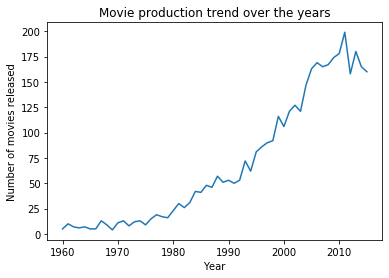

In [82]:
# Number of movies produced each year
movies_per_year= df['release_year'].value_counts().sort_index();
plt.plot(movies_per_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

In [83]:
#Years with maximum and minimum movie production  
movies_per_year.idxmax() , movies_per_year.idxmin()

(2011, 1969)

Movie production has increased over the years from 1960 to 2015. The decade of 2000 - 2010 shows a steep increase in production compared to previous decades.  The year 2014 with 700 movies, is the year of maximum movie production, and 1961 with 31 movies has been the year of least production

### Research Question 2a:     What are the top 20 highest grossing movies? 

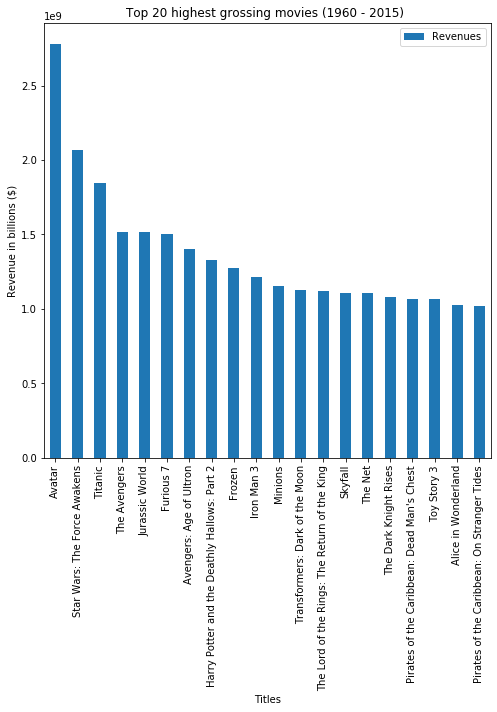

In [84]:
sorted_revenue = df['revenue'].sort_values(ascending=False)[:20]

high_grossers=pd.DataFrame()
titles=[]
revenues=[]
for i in sorted_revenue.index:
    titles.append(df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
high_grossers['Titles']=titles
high_grossers['Revenues']=revenues
high_grossers.set_index('Titles',inplace=True)
high_grossers.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 highest grossing movies (1960 - 2015) ');
plt.ylabel('Revenue in billions ($)');


In [85]:
#List of top 20 highest grossing movies and their revenue

high_grossers

,Revenues
Titles,
Avatar,2.781506e+09
Star Wars: The Force Awakens,2.068178e+09
Titanic,1.845034e+09
The Avengers,1.519558e+09
Jurassic World,1.513529e+09
Furious 7,1.506249e+09
Avengers: Age of Ultron,1.405036e+09
Harry Potter and the Deathly Hallows: Part 2,1.327818e+09
Frozen,1.274219e+09


The highest grossing movie over the time period 1960 - 2015 has been Avatar with a revenue of 2.8 billion dollars. 

 ### Research Question 2b: What are the top 20 most expensive movies?

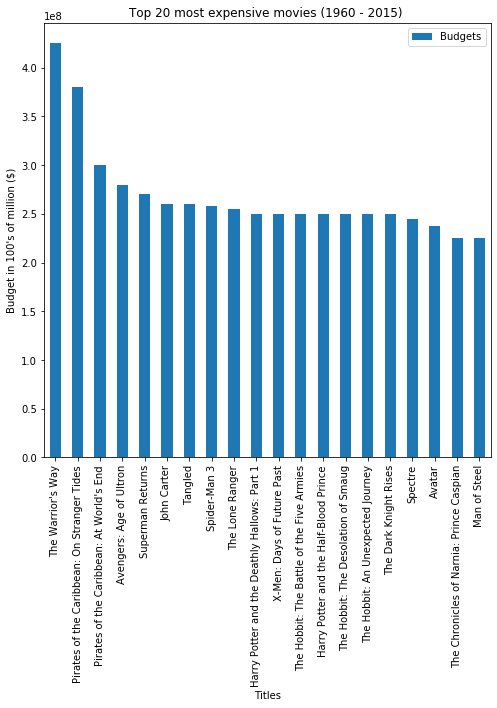

In [86]:
sorted_budget = df['budget'].sort_values(ascending=False)[:20]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 most expensive movies (1960 - 2015) ');
plt.ylabel('Budget in 100\'s of million ($)');

In [87]:
high_budget

,Budgets
Titles,
The Warrior's Way,425000000.0
Pirates of the Caribbean: On Stranger Tides,380000000.0
Pirates of the Caribbean: At World's End,300000000.0
Avengers: Age of Ultron,280000000.0
Superman Returns,270000000.0
John Carter,260000000.0
Tangled,260000000.0
Spider-Man 3,258000000.0
The Lone Ranger,255000000.0


The most expensive movie (highest budget) over the time period 1960 - 2015 has been The Warrior's way. This movie does not feature in the top 20 grossing movies. 

### Research Question 3: How do budgets correlate with revenues? Do high budgets mean high revenues?

In [88]:
# Explore the Budget and Revenue columns - find rows with zeros for budget and revenue

cols=['budget','revenue','release_date']

len(df[(df['budget']==0) | (df['revenue']==0)])


0

There are 7011 rows where budget or revenue is zero. For the purpose of this analysis, zeros are treated as missing values. Records that have missing / zero budget or revenue data are ignored and a subset of data with non zero budgets and revenues is used for the analysis. 

In [89]:
df2=df[(df['budget']>0) & (df['revenue']>0)]
df2.shape

(3854, 13)

This dataframe with 3854 records will be used to find the correlation between budget and revenue

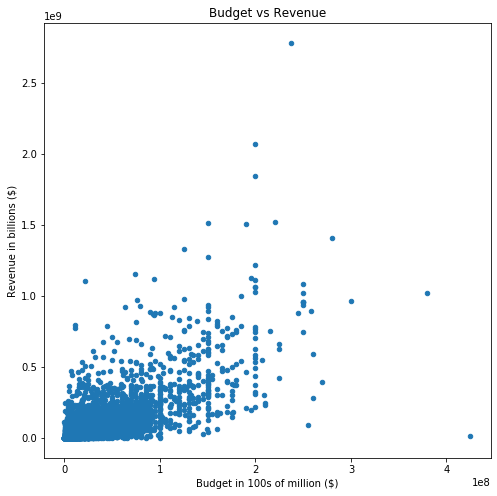

In [90]:
df2.plot(x='budget',y='revenue',kind='scatter',figsize=(8,8));
plt.title('Budget vs Revenue')
plt.xlabel('Budget in 100s of million ($)');
plt.ylabel('Revenue in billions ($)');


### Calculation of Pearson's correlation coefficient

In [91]:
def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(df2['budget'],df2['revenue'])


0.688556152463676

From the uphill scatterplot and the value of 0.69 for the Pearson's coefficient we can infer that there is a positive relationship between budget and revenue. However , not a perfectly positive correlation. It can be seen from the plot that there are some movies with high budgets but low revenues and some with low budgets and high revenues. The outliers are more with high budget movies which get low/ moderate revenues. 

### Research Question 4: Average runtime of all the movies.

In [92]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

#calling above function
avg_fun('runtime')

109.22029060716139

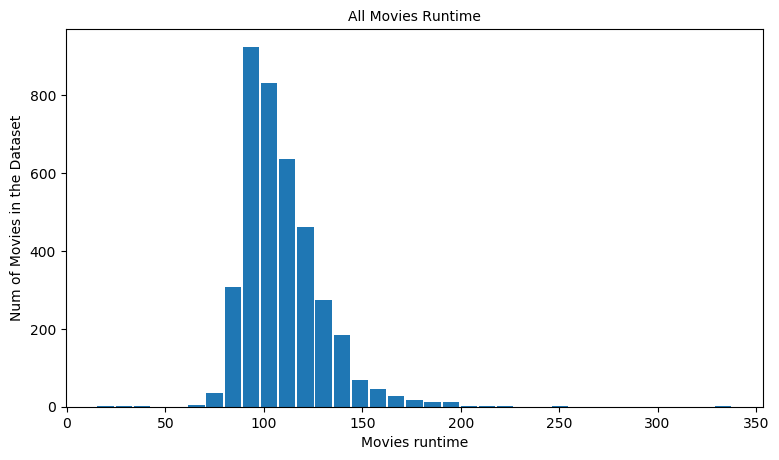

In [93]:
#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

plt.xlabel('Movies runtime', fontsize = 10) 
plt.ylabel('Num of Movies in the Dataset', fontsize=10)

#Name of the graph
plt.title('All Movies Runtime', fontsize=10)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

> The distribution of the above formed graph is positively skewed to the right. Most of the movies are timed between 80 to 115 minutes.
>**Lets analyzing more about movie runtime using different kind of plots like Box Plot and Data Point Plot**


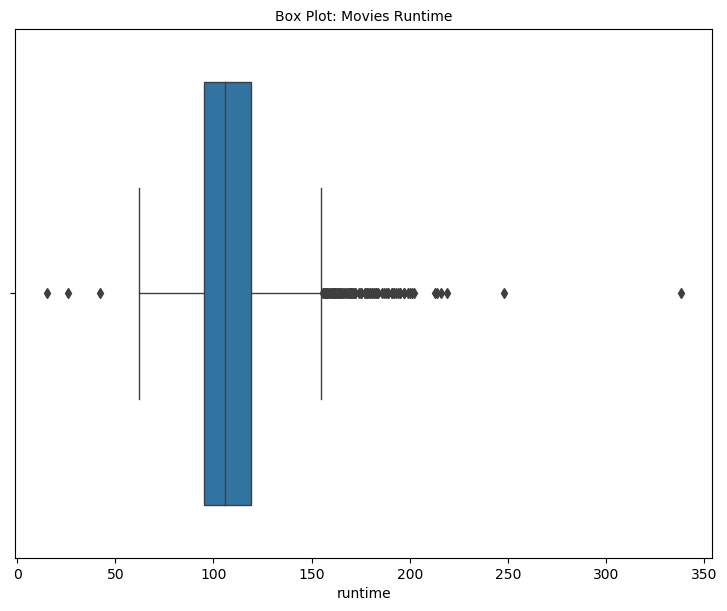

In [94]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 100)

#Name of the graph
plt.title('Box Plot: Movies Runtime', fontsize=10)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 1)
#diplaying the graph
plt.show()

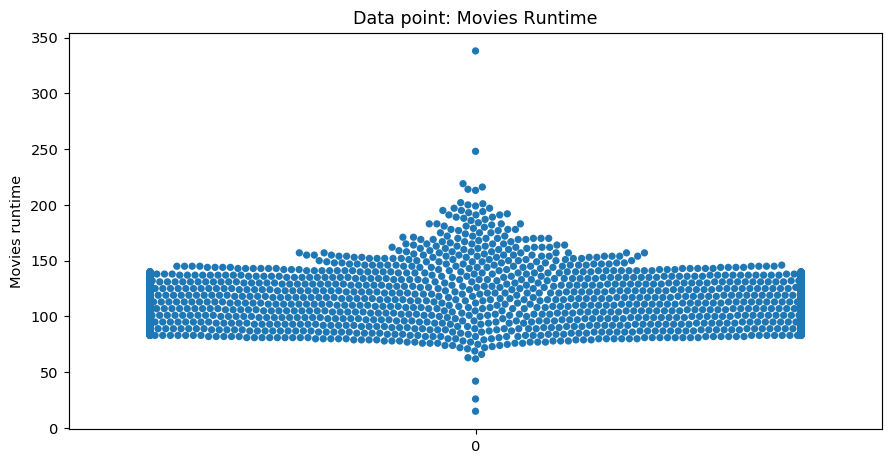

In [95]:

plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(data=df['runtime'])

plt.title('Data point: Movies Runtime')
plt.ylabel('Movies runtime', fontsize=10)

#displaying the plot
plt.show()

In [97]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>By looking at both the plot and calculations, we can conclude that..
>
> 1. 25% of movies have a runtime of less than 95 minutes
> 2. 50% of movies have a runtime of less than 109 minutes. (median)
> 3. 75% of movies have a runtime of less than 119 minutes

### Research Question 5: How do ratings correlate with commercial success (profits)?

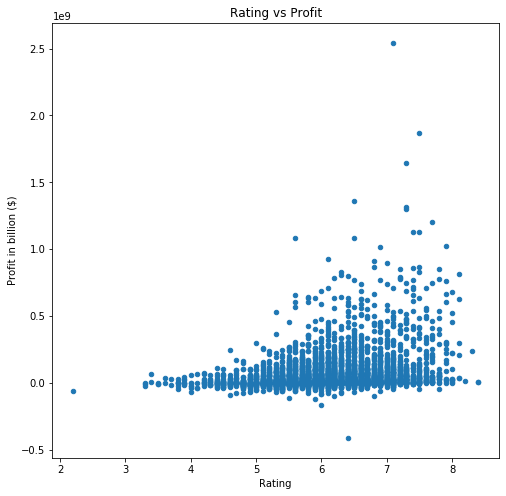

In [102]:
df2['Profit']=df2['revenue']-df2['budget']
df2.plot(x='vote_average',y='Profit',kind='scatter',figsize=(8,8));
plt.ylabel('Profit in billion ($)');
plt.xlabel('Rating');
plt.title('Rating vs Profit');

In [103]:
correlation_coeff(df2['vote_average'],df2['Profit'])

0.25943499037670126

The rating (vote_average) and profits appear to have a weak positive (uphill) relationship implying that a high rating does not strongly correlate to high profits.


### Research Question 6: What run times are associated with each genre?

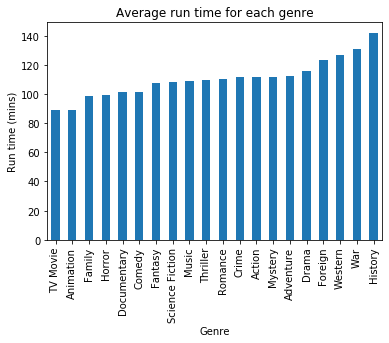

In [104]:
# Drop rows with null values in genre and director columns
df.dropna(subset=['genres'],inplace=True)

#Converting the 'genre' column into a list of genres by solitting at the pipe symbol
df['genres']= np.where((df['genres'].str.contains('\|')), df['genres'].str.split('|'), df['genres'])

#Making sure every row has data as a list, even if only one genre is present
df.loc[:, 'genres'] = df.genres.apply(np.atleast_1d)

# Horizontally stacking all the lists from all rows into one big list
all_genres = np.hstack(df.genres)

# n contains the runtime for that row while l contains the list of genres for that row 
#Repeating the runtime as many times as the length of list l and merging it all into one list
all_runtimes=[]
for n,l in df[['runtime','genres']].values:
    all_runtimes=all_runtimes+([n]*len(l))
    
# Assigning the merged lists / arrays to a new dataframe 
a = pd.DataFrame({'genre':all_genres, 'runtime':all_runtimes})

# Group by genre and find the average of runtimes sorted in ascending order
runtime_by_genre=a.sort_values(['runtime']).groupby('genre')['runtime'].mean()
runtime_by_genre.sort_values().plot(kind='bar');
plt.title('Average run time for each genre');
plt.ylabel('Run time (mins)');
plt.xlabel('Genre');

History is the genre with the longest movies while animation movies are the shortest.    


### Research Question 7: Who are the top 20 directors who made highly rated films? 

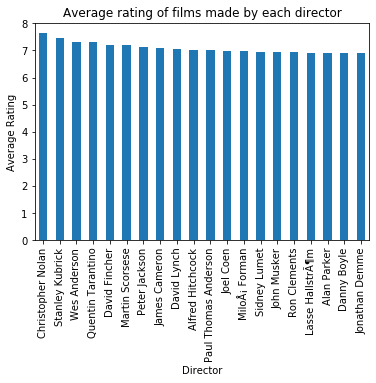

In [105]:
# Drop rows with null values in the director column
df.dropna(subset=['director'],inplace=True)

#Converting the column into a list of directors by splitting at the pipe symbol
df['director']= np.where((df['director'].str.contains('\|')), df['director'].str.split('|'), df['director'])

#Making sure every row has data as a list, even if only one director is present
df.loc[:, 'director'] = df.director.apply(np.atleast_1d)

# Horizontally stacking all the lists from all rows into one big list
all_directors = np.hstack(df.director)

# n contains the rating for that row while l contains the list of directors for that row 
#Repeating n as many times as the length of list l and merging it all into one list
all_ratings=[]
for n,l in df[['vote_average','director']].values:
    all_ratings=all_ratings+([n]*len(l))
    
# Assigning the merged lists / arrays to a new dataframe 
c = pd.DataFrame({'Director':all_directors, 'Rating':all_ratings})


director_counts = c['Director'].value_counts() 

# Create a list of directors who have made more than 5 movies 
consider=(director_counts[director_counts>5])
directors_considered= list(consider.index)

# Creating a new dataframe with information on the directors from the above list
d=c[c['Director'].isin(directors_considered)]

# Plotting based on highest average ratings (top 20 directors)
rating_by_director=d.sort_values(['Rating']).groupby('Director')['Rating'].mean()
rating_by_director.sort_values(ascending = False)[:20].plot(kind='bar');
plt.title('Average rating of films made by each director');
plt.ylabel('Average Rating');
plt.xlabel('Director');

In [106]:
rating_by_director.sort_values(ascending = False)[:20]

Director
Christopher Nolan       7.637500
Stanley Kubrick         7.450000
Wes Anderson            7.314286
Quentin Tarantino       7.308333
David Fincher           7.210000
Martin Scorsese         7.200000
Peter Jackson           7.145455
James Cameron           7.100000
David Lynch             7.062500
Alfred Hitchcock        7.016667
Paul Thomas Anderson    7.000000
Joel Coen               6.991667
MiloÅ¡ Forman           6.983333
Sidney Lumet            6.950000
John Musker             6.933333
Ron Clements            6.933333
Lasse HallstrÃ¶m        6.911111
Alan Parker             6.900000
Danny Boyle             6.900000
Jonathan Demme          6.900000
Name: Rating, dtype: float64

It seems reasonable to consider only directors who have made more than 5 movies in the time period 1960 - 2015 represented in the dataset because the time period is large and the ranking is done over a large number of directors. The above are top 20 directors (who have more than 5 films) who made highly rated films, with the average ratings of their films.


<a id='conclusions'></a>
## Conclusions
<br>
The dataset was assessed and necessary cleaning steps were performed as documented above. Datatypes were made relevant to the context of the columns, duplicates were removed and zeros and null values were dealt with under the exploration of each research question, according to the reasoning provided.
Removal of rows containing nulls and/or zeros reduced the data available for analysis, which may impact the results. The correlations explained do not imply causations. The inferences made are tentative and have scope for further refinement. 
<br>
The analysis identifies the top 20 highest grossing movies, top 20 most expensive movies,  months with the most movie releases,  run times associated with each genre, and top 20 directors based on the rating of their films
 <br>
The analysis also explores the correlation of budgets with revenues, association of month of release with better revenues, and correlation of ratings with commercial success. 
<br>
<br>
<h3>Limitations</h3> 
I want to make it clear, it's not 100 percent guaranteed solution that this formula is gonna work, meaning we are going to earn more than \$50M! But it shows us that we have high probability of making high profits if we had similar characteristics as such. All these directors, actors, genres and released dates have a common trend of attraction. If we release a movie with these characteristics, it gives people high expectations from this movie. Thus attracting more people towards the movie but it ultimately comes down to story mainly and also other important influential factors. People having higher expectations gives us less probability of meeting their expectations. Even if the movie was worth, people's high expectations would lead in biased results ultimately effecting the profits. We also see this in real life specially in sequels of movies. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of!
<br>
I have referred to Stack Overflow and Udacity Slack forums for help to complete the analysis. 



In [107]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295